In [94]:
%matplotlib inline 
# see predict.py lib for functions
from predict import *
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 15, 9

In [95]:
ls datastore/paystations/

17066_374_days.d          76429_1-2013-to-4-2016.d  76429_old.zip
32489_374_days.d          76429_2014ToNow.d         8005_374_days.d
32489_old.zip             76429_7_day_prediction.d


Range : 2013-02-02 00:00:00 to 2015-12-20 00:00:00


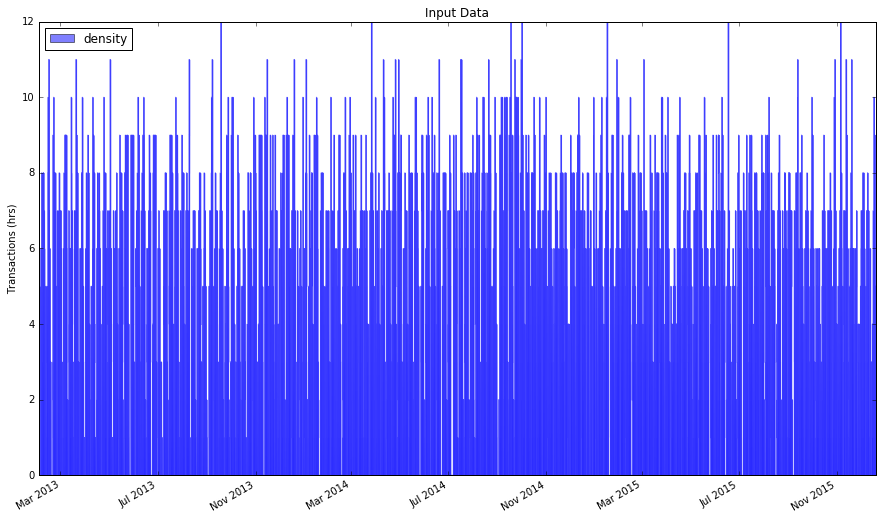

In [96]:
# Init Data
data_path = 'datastore/paystations/'
data_file = '76429_1-2013-to-4-2016.d'
start = '2-2-2013' # earliest date
# start = '1-1-2014' # debug
end = '1-1-2016'
end = '12-20-2015' # debug

ts = load_data(data_path + data_file, start, end)
X = init_features(ts)  # features considered for prediction
Y = ts['density']  # variable to predict


MSE: 2.0299
Mean Error (R2): 0.7542 cars
Score : 0.5459


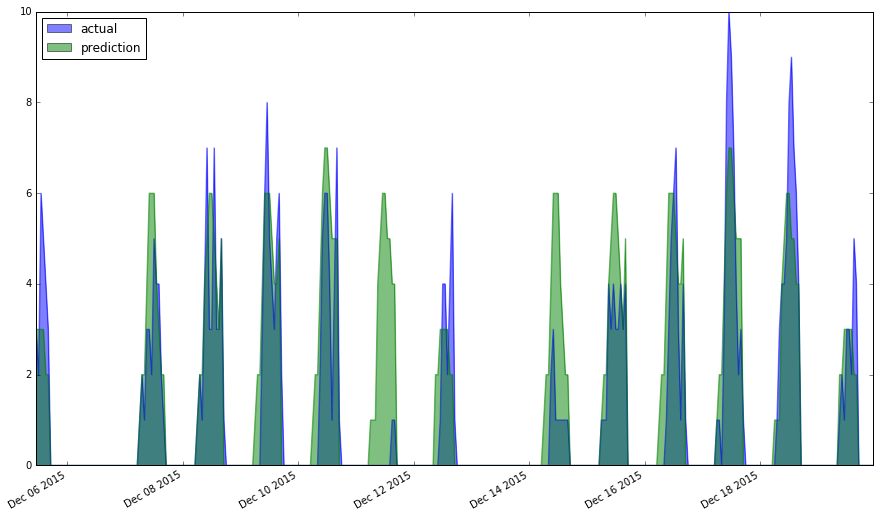

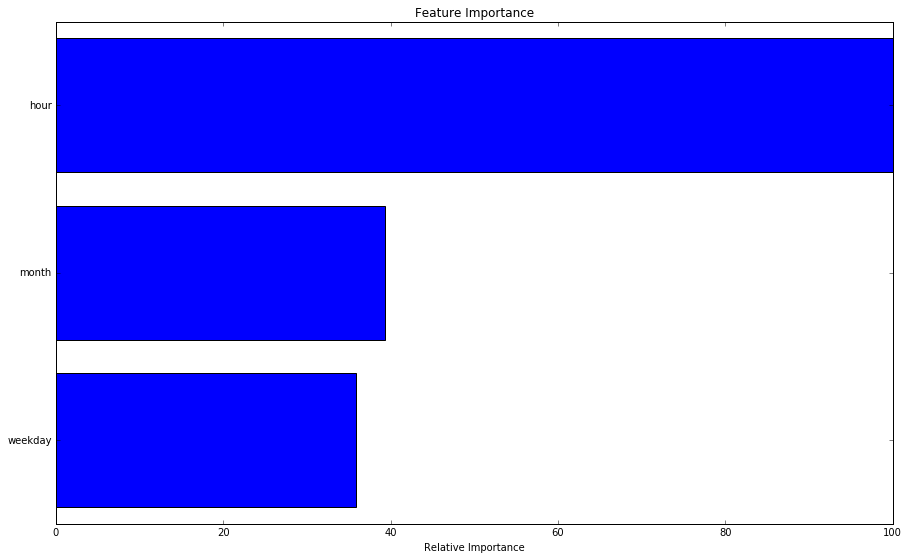

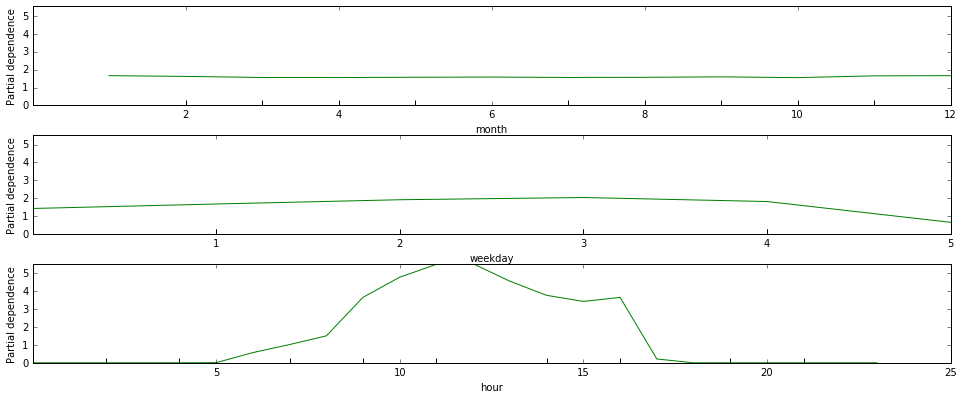

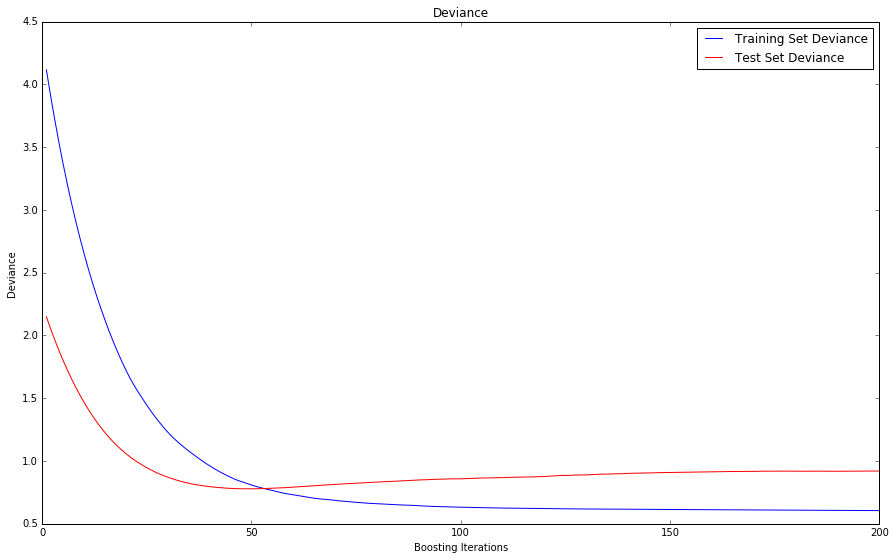

In [97]:
# Gradient Boosting Model
model_params = {'n_estimators': 200, 'max_depth': 6,
                'learning_rate': 0.03, 'loss': 'huber', 'alpha': 0.95}

# Option 1: random sample training(80% train)
# x_train, y_train, x_test, y_test = train_stochastic(X, Y, 0.8)  

# Option 2: Chronological training
predict_window = 15 # predict 1 week
x_train, y_train, x_test, y_test = train_history(X, Y, predict_window)  # train past data

# Results
results = GradientBoostingRegressor(**model_params).fit(x_train, y_train)
prediction = np.round(results.predict(x_test))


# Results
print_error(prediction, y_test)
print "Score : %0.4f" % float(results.score(x_test, y_test))
plot_prediction(prediction, x_test, y_test)
feature_importance(results, X)
feature_dependence(results, X, x_train)
training_deviance(results, x_test, y_test, model_params)


/usr/local/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function staged_decision_function is deprecated;  and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


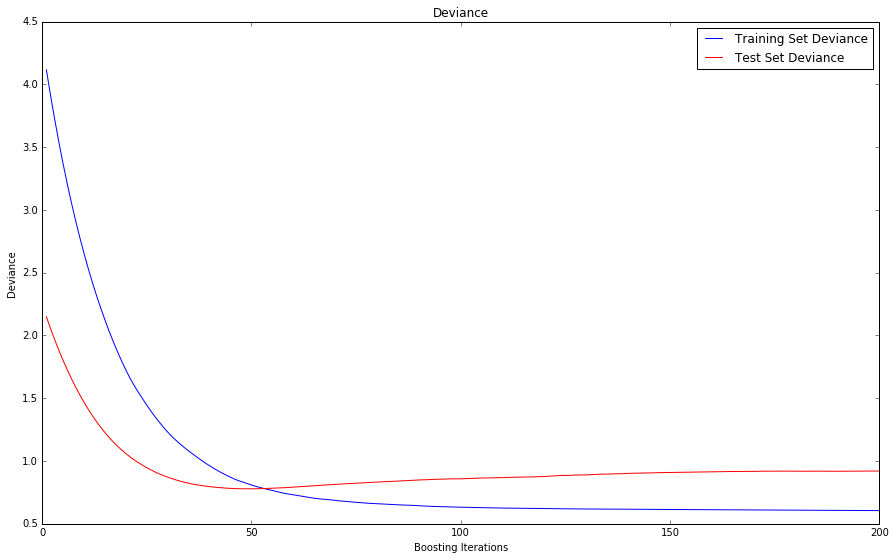

In [89]:
training_deviance(results, x_test, y_test, model_params)


MSE: 2.2027
Mean Error (R2): 0.7807 cars
Score : 0.5089


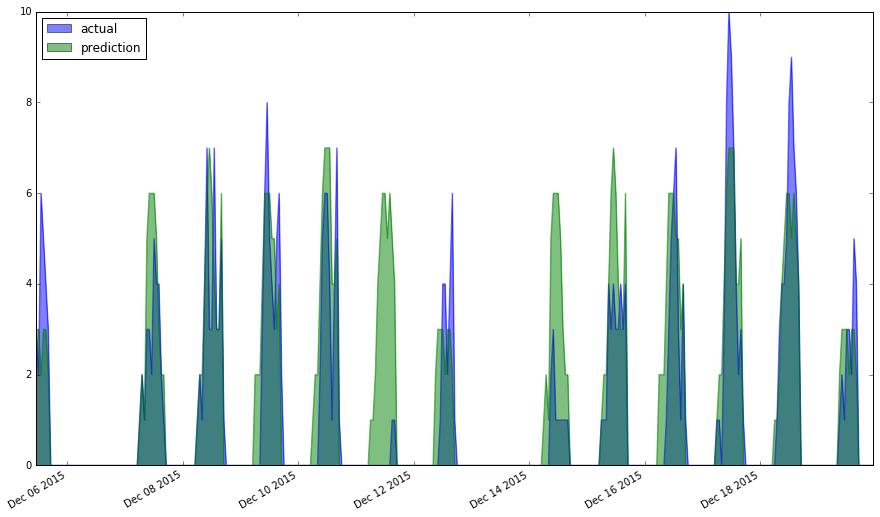

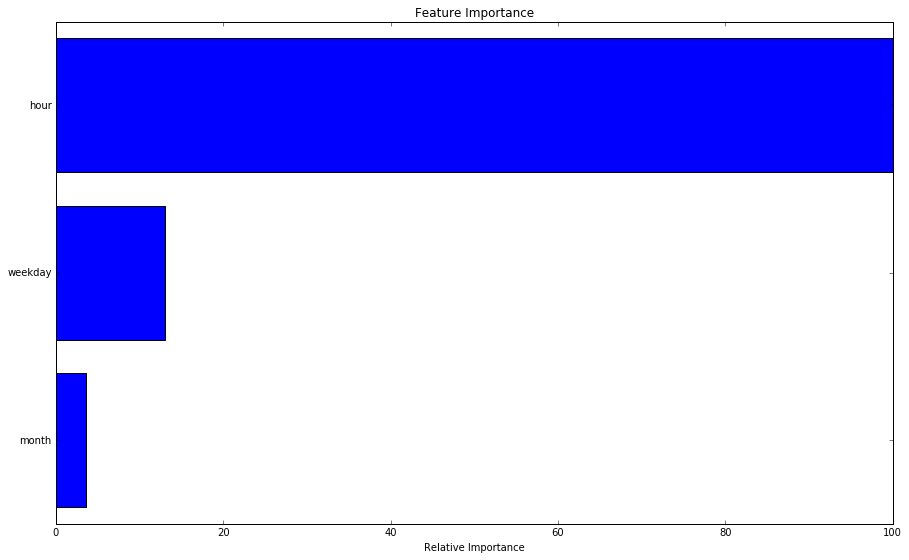

In [91]:
# Random Forests Model
predict_window = 15 # predict 1 week
x_train, y_train, x_test, y_test = train_history(X, Y, predict_window)  # train past data

results = RandomForestRegressor(n_estimators=10).fit(x_train, y_train)

# Results
prediction = np.round(results.predict(x_test))


# Results
print_error(prediction, y_test)
print "Score : %0.4f" % float(results.score(x_test, y_test))
plot_prediction(prediction, x_test, y_test)
feature_importance(results, X)